In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'svg'

rc = {'font.family': 'serif',
      'font.serif': 'Times New Roman',
      'font.variant': 'normal',
      'font.weight':  'normal',
      'font.stretch': 'normal',
      'font.size':    14.0,
      'mathtext.default': 'regular',
      'mathtext.fontset': 'stix'}
plt.rcParams.update(rc)

### Формирование исходных данных

In [50]:
Rtab = np.array(pd.read_excel('Rg.xlsx')) #
Cptab = np.array(pd.read_excel('Cpg.xlsx')) #
ktab = np.array(pd.read_excel('kg.xlsx')) #
mutab = np.array(pd.read_excel('Mu.xlsx')) #
lambdatab = np.array(pd.read_excel('Lt.xlsx')) #
H2O = np.array(pd.read_excel('H2O.xlsx'))
CO2 = np.array(pd.read_excel('CO2.xlsx'))
CH4 = np.array(pd.read_excel('CH4.xlsx'))
Pr = np.array(pd.read_excel('Pr.xlsx')) #
MMg = np.array(pd.read_excel('MMg.xlsx')) #


In [51]:
ptab = np.array([0.1, 1, 10, 20])
TERM = np.array([Rtab, Cptab, ktab, mutab, lambdatab, H2O, CO2, CH4, Pr, MMg])
def SYST_INTERP(I, p, T):
    for i in range(ptab.shape[0] - 1):
        if (ptab[i] <= p) and (ptab[i+1] >= p):
            Np = i
            break
    def c_1(x):
        c_1 = interp1d(TERM[I][:, 0], TERM[I][:, Np+1])
        return c_1(x)
    def c_2(x):
        c_2 = interp1d(TERM[I][:, 0], TERM[I][:, Np+2])
        return c_2(x)
    def c(x):
        return c_1(x) + ((c_2(x) - c_1(x)) / (ptab[Np+1] - ptab[Np])) * (p - ptab[Np])
    return c(T)

In [52]:
ptab.shape

(4,)

In [53]:
def R_func(p, T):
    return SYST_INTERP(0, p, T) #
def C_p_func(p, T):
    return SYST_INTERP(1, p, T)*1e3 #
def k_func(p, T):
    return SYST_INTERP(2, p, T) #
def mu_func(p, T):
    return SYST_INTERP(3, p, T) #
def lambda_func(p, T):
    return SYST_INTERP(4, p, T) #
def H2O_func(p, T):
    return SYST_INTERP(5, p, T)
def CO2_func(p, T):
    return SYST_INTERP(6, p, T)
def CH4_func(p, T):
    return SYST_INTERP(7, p, T)
def Pr_func(p,T):
    return C_p_func(p, T) * mu_func(p, T) / lambda_func(p,T)
# def Pr_func(p,T):
#     return SYST_INTERP(8, p, T)
def MMg_func(p, T):
    return SYST_INTERP(9, p, T)
def q_GD(lam, k):
    q = (lam * ((1 - ((k - 1) / (k + 1)) * (lam**2)) ** (1/(k-1)))) / ((2 / (k+1)) ** (1 / (k-1)))
    return q
def tau_GD(lam, k):
    tau = 1 - ((k-1) / (k+1)) * (lam**2)
    return tau
def pi_GD(lam, k ):
    π = (1 - ((k-1) / (k+1)) * (lam ** 2)) ** (k / (k-1))
    return π

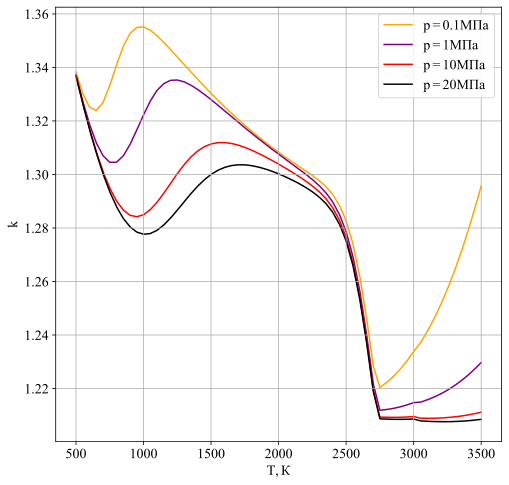

In [48]:
T_for_plot = np.linspace(500, 3500, 1000)
p_for_plot = [0.1, 1, 10, 20]
cl1, cl2, cl3 = 'orange', 'purple', 'red'
colors = [cl1, cl2, cl3, 'black']

f = plt.figure(figsize=(8, 8))
plt.plot(T_for_plot, k_func(
    p_for_plot[0], T_for_plot), color=colors[0], zorder=1, label='$p = 0.1 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[0], T_for_plot), color = 'black', zorder = 2, facecolor = 'white')

plt.plot(T_for_plot, k_func(
    p_for_plot[1], T_for_plot), color=colors[1], zorder=1, label='$p = 1 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[1], T_for_plot), color = 'blue', zorder = 2, facecolor = 'white', marker = 's')

plt.plot(T_for_plot, k_func(
    p_for_plot[2], T_for_plot), color=colors[2], zorder=1, label='$p = 10 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[2], T_for_plot), color = 'red', zorder = 2, facecolor = 'white')

plt.plot(T_for_plot, k_func(
    p_for_plot[3], T_for_plot), color=colors[3], zorder=1, label='$p = 20 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[3], T_for_plot), color = 'green', zorder = 2, facecolor = 'green', marker = 'x')

plt.xlabel('$Т,К$')
plt.ylabel('$k$')
plt.legend()
plt.grid()
plt.show()

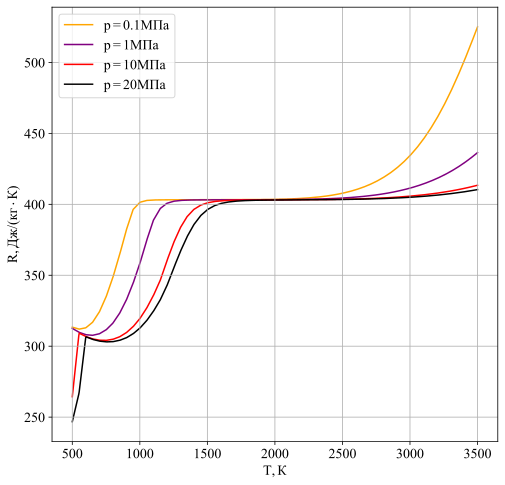

In [39]:
f = plt.figure(figsize=(8, 8))
plt.plot(T_for_plot, R_func(
    p_for_plot[0], T_for_plot), color=colors[0], zorder=1, label='$p = 0.1 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[0], T_for_plot), color = 'black', zorder = 2, facecolor = 'white')

plt.plot(T_for_plot, R_func(
    p_for_plot[1], T_for_plot), color=colors[1], zorder=1, label='$p = 1 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[1], T_for_plot), color = 'blue', zorder = 2, facecolor = 'white', marker = 's')

plt.plot(T_for_plot, R_func(
    p_for_plot[2], T_for_plot), color=colors[2], zorder=1, label='$p = 10 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[2], T_for_plot), color = 'red', zorder = 2, facecolor = 'white')

plt.plot(T_for_plot, R_func(
    p_for_plot[3], T_for_plot), color=colors[3], zorder=1, label='$p = 20 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[3], T_for_plot), color = 'green', zorder = 2, facecolor = 'green', marker = 'x')

plt.xlabel('$Т,К$')
plt.ylabel('$R,Дж / (кг \cdot К)$')
plt.legend()
plt.grid()
plt.show()


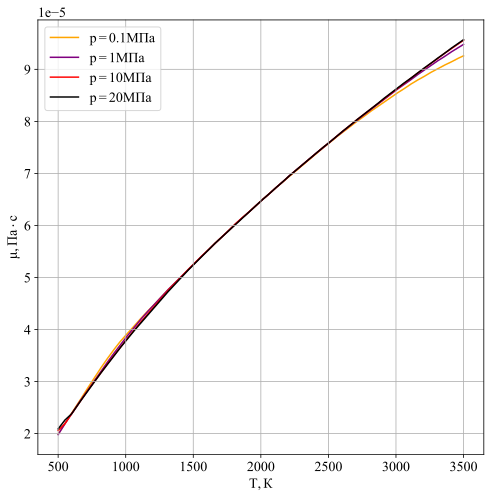

In [40]:
f = plt.figure(figsize=(8, 8))
plt.plot(T_for_plot, mu_func(
    p_for_plot[0], T_for_plot), color=colors[0], zorder=1, label='$p = 0.1 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[0], T_for_plot), color = 'black', zorder = 2, facecolor = 'white')

plt.plot(T_for_plot, mu_func(
    p_for_plot[1], T_for_plot), color=colors[1], zorder=1, label='$p = 1 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[1], T_for_plot), color = 'blue', zorder = 2, facecolor = 'white', marker = 's')

plt.plot(T_for_plot, mu_func(
    p_for_plot[2], T_for_plot), color=colors[2], zorder=1, label='$p = 10 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[2], T_for_plot), color = 'red', zorder = 2, facecolor = 'white')

plt.plot(T_for_plot, mu_func(
    p_for_plot[3], T_for_plot), color=colors[3], zorder=1, label='$p = 20 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[3], T_for_plot), color = 'green', zorder = 2, facecolor = 'green', marker = 'x')

plt.xlabel('$Т,К$')
plt.ylabel('$\mu, Па \cdot с$')
plt.legend()
plt.grid()
plt.show()

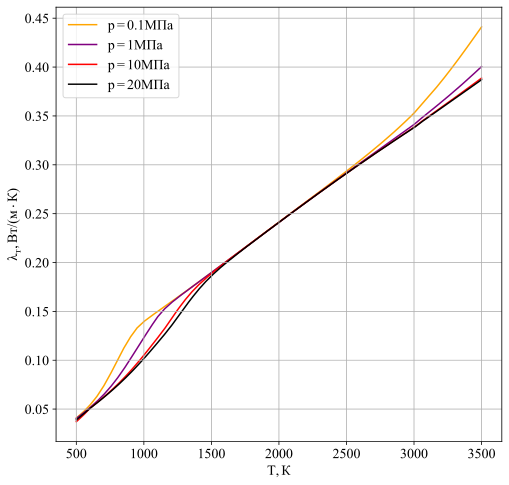

In [41]:
f = plt.figure(figsize=(8, 8))
plt.plot(T_for_plot, lambda_func(
    p_for_plot[0], T_for_plot), color=colors[0], zorder=1, label='$p = 0.1 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[0], T_for_plot), color = 'black', zorder = 2, facecolor = 'white')

plt.plot(T_for_plot, lambda_func(
    p_for_plot[1], T_for_plot), color=colors[1], zorder=1, label='$p = 1 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[1], T_for_plot), color = 'blue', zorder = 2, facecolor = 'white', marker = 's')

plt.plot(T_for_plot, lambda_func(
    p_for_plot[2], T_for_plot), color=colors[2], zorder=1, label='$p = 10 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[2], T_for_plot), color = 'red', zorder = 2, facecolor = 'white')

plt.plot(T_for_plot, lambda_func(
    p_for_plot[3], T_for_plot), color=colors[3], zorder=1, label='$p = 20 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[3], T_for_plot), color = 'green', zorder = 2, facecolor = 'green', marker = 'x')

plt.xlabel('$Т,К$')
plt.ylabel('$\lambda_т, Вт / (м \cdot К)$')
plt.legend()
plt.grid()
plt.show()


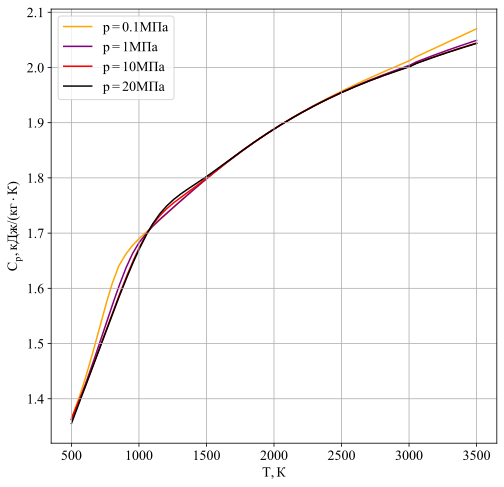

In [54]:
f = plt.figure(figsize=(8, 8))
plt.plot(T_for_plot, C_p_func(
    p_for_plot[0], T_for_plot)*1e-3, color=colors[0], zorder=1, label='$p = 0.1 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[0], T_for_plot), color = 'black', zorder = 2, facecolor = 'white')

plt.plot(T_for_plot, C_p_func(
    p_for_plot[1], T_for_plot)*1e-3, color=colors[1], zorder=1, label='$p = 1 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[1], T_for_plot), color = 'blue', zorder = 2, facecolor = 'white', marker = 's')

plt.plot(T_for_plot, C_p_func(
    p_for_plot[2], T_for_plot)*1e-3, color=colors[2], zorder=1, label='$p = 10 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[2], T_for_plot), color = 'red', zorder = 2, facecolor = 'white')

plt.plot(T_for_plot, C_p_func(
    p_for_plot[3], T_for_plot)*1e-3, color=colors[3], zorder=1, label='$p = 20 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[3], T_for_plot), color = 'green', zorder = 2, facecolor = 'green', marker = 'x')

plt.xlabel('$Т,К$')
plt.ylabel('$C_p, кДж / (кг \cdot К)$')
plt.legend()
plt.grid()
plt.show()


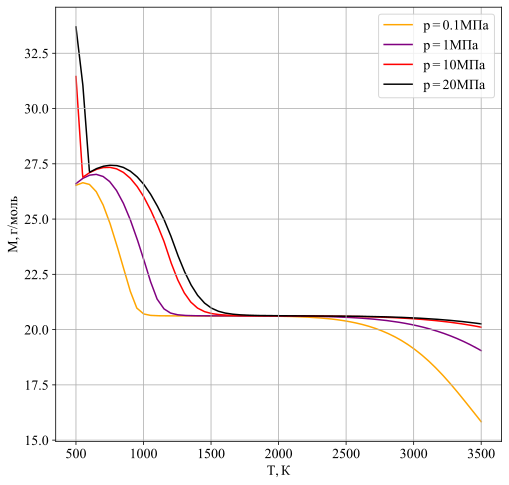

In [57]:
f = plt.figure(figsize=(8, 8))
plt.plot(T_for_plot, MMg_func(
    p_for_plot[0], T_for_plot), color=colors[0], zorder=1, label='$p = 0.1 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[0], T_for_plot), color = 'black', zorder = 2, facecolor = 'white')

plt.plot(T_for_plot, MMg_func(
    p_for_plot[1], T_for_plot), color=colors[1], zorder=1, label='$p = 1 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[1], T_for_plot), color = 'blue', zorder = 2, facecolor = 'white', marker = 's')

plt.plot(T_for_plot, MMg_func(
    p_for_plot[2], T_for_plot), color=colors[2], zorder=1, label='$p = 10 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[2], T_for_plot), color = 'red', zorder = 2, facecolor = 'white')

plt.plot(T_for_plot, MMg_func(
    p_for_plot[3], T_for_plot), color=colors[3], zorder=1, label='$p = 20 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[3], T_for_plot), color = 'green', zorder = 2, facecolor = 'green', marker = 'x')

plt.xlabel('$Т,К$')
plt.ylabel('$M, г / моль$')
plt.legend()
plt.grid()
plt.show()


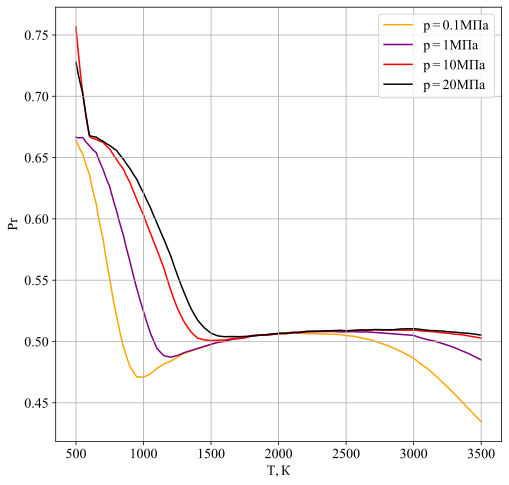

In [60]:
f = plt.figure(figsize=(8, 8))
plt.plot(T_for_plot, Pr_func(
    p_for_plot[0], T_for_plot), color=colors[0], zorder=1, label='$p = 0.1 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[0], T_for_plot), color = 'black', zorder = 2, facecolor = 'white')

plt.plot(T_for_plot, Pr_func(
    p_for_plot[1], T_for_plot), color=colors[1], zorder=1, label='$p = 1 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[1], T_for_plot), color = 'blue', zorder = 2, facecolor = 'white', marker = 's')

plt.plot(T_for_plot, Pr_func(
    p_for_plot[2], T_for_plot), color=colors[2], zorder=1, label='$p = 10 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[2], T_for_plot), color = 'red', zorder = 2, facecolor = 'white')

plt.plot(T_for_plot, Pr_func(
    p_for_plot[3], T_for_plot), color=colors[3], zorder=1, label='$p = 20 МПа$')
# plt.scatter(T_for_plot, k_func(p_for_plot[3], T_for_plot), color = 'green', zorder = 2, facecolor = 'green', marker = 'x')

plt.xlabel('$Т,К$')
plt.ylabel('$Pr$')
plt.legend()
plt.grid()
plt.show()

In [59]:
t_p = 2.6 # время работы ДУ
omega = 28.5 # масса топлива
D = 0.170 # наружный диаметр двигателя
# Параметры топлива
T_0 = 3458.32 # K
p_0 = 11.9 # МПа
rho = 1801 # кг/м^3
v = 0.25
k_KC = 1.2657
nu_a_old = 11.665184
def F_z(T_z):
    T_n = 291
    D_t = 0.003
    return np.exp(D_t * (T_z - T_n))
z = 0.307485
rho_kf = 3990  # кг/м^3

Q = ((k_func(p_0, T_0)) / (k_func(p_0, T_0) - 1)) * R_func(p_0, T_0) * T_0
print('Q_ж = ', round(Q*1e-6, 3), 'МДж / кг')

hi_T = 1.461563 # отсутствие k-f


Q_ж =  8.202 МДж / кг


In [21]:
p_a = round(101325e-6, 1) # Проектирование ведется на высоте Н = 1 км
def NUa():
    p_a = round(101325e-6, 1) # Проектирование ведется на высоте Н = 1 км
    lam_00 = np.sqrt((k_func(p_0, T_0) + 1) / (k_func(p_0, T_0) - 1))
    def func_for_lambda(lam):
        return 1 / nu_a_old - q_GD(lam, k_func(p_0, T_0))
    lam_a_0 = fsolve(func_for_lambda, lam_00 - 1)
    lam_a_0 = lam_a_0[0]
    T_a_0 = T_0 * tau_GD(lam_a_0, k_func(p_0, T_0))
    eps_lam = 100
    eps_T = 100
    ii = 0
    while (eps_lam > 0.001) and (eps_T > 1):
        T_a_i = T_0 * tau_GD(lam_a_0, k_func(p_a, T_a_0))
        def func_for_lambda_i(lam):
            return  (p_a / p_0) - pi_GD(lam, k_func(p_a, T_a_0))
        lam_a_i = fsolve(func_for_lambda_i, lam_00 - 0.5)
        eps_lam = np.abs(lam_a_i[0] - lam_a_0)
        lam_a_0 = lam_a_i[0]
        eps_T = np.abs(T_a_i - T_a_0)
        T_a_0 = T_a_i
    def for_nu_a(nu_a):
        return 1 / nu_a - q_GD(lam_a_0, k_func(p_a, T_a_0))
    nu_a = fsolve(for_nu_a, 10)
    return nu_a[0], lam_a_0, T_a_0
nu_a = NUa()[0]
lambda_a = NUa()[1]
T_a = NUa()[2]

print(f'Коэффициент уширения сопла nu_a = {round(nu_a,2)}')
print(f'Безразмерная скорость потока на выходе из сопла lam_a = {round(lambda_a,3)}')
print(f'Температура потока на выходе из сопла Т_a = {round(T_a)} К')
print(f'Показатель адиабаты в КС k =  {k_KC}')
print(f'Показатель адиабаты в выходном сечении сопла к = {round(k_func(p_a, T_a), 5)}')

ValueError: A value in x_new is below the interpolation range.

In [9]:
# Расчет осредненных тепловых потерь
sigma_T = 300
v_T = 0.7
F_ohl = 0.045
G_T = omega / t_p

hi_tepl = 1 - ((sigma_T * v_T * F_ohl * p_0*1e6) / (Q * R_func(p_0, T_0) * G_T)) - (((k_func(p_0, T_0)) / (k_func(p_0, T_0) - 1)) * (p_0*1e6 / rho / Q))
print(f'Средний газоприход от горения топлива G_T = {round(G_T,1)} кг/с')
print(f'Коэффициент тепловых потерь hi_tepl = {round(hi_tepl, 4)}')

sigma_B = 2100
T_z_max = + 50 + 273
eta = 1.1
delta_tzp_2 = 0.004

delta_st = eta * ((p_0*1e6 * D) / (2 * sigma_B * 1e6)) * (F_z(T_z_max)**(1 / (1 - v)))
delta_st = round(delta_st, 3)
print(f'Толщина стенки обечайки камеры сгорания delta_ст = {round(delta_st, 3)*1e3} мм')

Средний газоприход от горения топлива G_T = 11.0 кг/с
Коэффициент тепловых потерь hi_tepl = 0.992
Толщина стенки обечайки камеры сгорания delta_ст = 1.0 мм


### Профилирование сопла

In [10]:
def A_1_func(k):
    A_1 = np.sqrt(k* ((2 / (k+1)) ** ((k+1) / (k-1))))
    return A_1
# Коэффициент расхода сопла
mu_c = 0.95

In [11]:
# Для профилированного сопла необходимо вычислить значение
# трех основынх площадей: входного, критического и выходного
# Диаметр входного сечения
D_vh = D - 2 * delta_st - 2 * delta_tzp_2
print(f'Диаметр входного сечения D_вх =  {D_vh*1e3} мм')

# Площадь критического сечения для общего случая при наличии k-f
F_kr = np.sqrt(((k_func(p_0, T_0) - 1) / (k_func(p_0, T_0))) * (hi_tepl * Q)) * (G_T / (mu_c * A_1_func(k_func(p_0, T_0)) * p_0*1e6)) * (1 / hi_T)
D_kr = np.sqrt(4 * F_kr / np.pi)
D_a = D_kr * np.sqrt(nu_a)

print(f'Площадь критичсекого сечения F_kr = {round(F_kr, 5)} м^2')
print(f'Диаметр критики D_kr = {round(D_kr, 4)} м')
print(f'Диаметр выходного сечения D_а = {round(D_a, 4)} м')

Диаметр входного сечения D_вх =  160.0 мм
Площадь критичсекого сечения F_kr = 0.00121 м^2
Диаметр критики D_kr = 0.0393 м
Диаметр выходного сечения D_а = 0.1264 м


In [12]:
# Профилирование сверхзвуковой части сопла

r_kr = D_kr / 2
r_a = D_a / 2
print(f'Радиус критического сечения r_kr = {r_kr} м')
print(f'Отношение радиуса выходного сечения к радиусу критики R_a / R_kr = {round(r_a / r_kr, 2)}')
L_r_kr = 5.2
beta_a = 0.3
beta_vh = 0.5
L_a = L_r_kr * r_kr
print(f'Угол наклона образующей сверхзвуковой части на входе beta_вх = {round(np.rad2deg(beta_vh))}')
print(f'Угол наклона образующей в выходном сечении beta_a =  {round(np.rad2deg(beta_a))}')
print(f'Длина L_a = {round(L_a * 1e3)} мм')


Радиус критического сечения r_kr = 0.019627283522989102 м
Отношение радиуса выходного сечения к радиусу критики R_a / R_kr = 3.22
Угол наклона образующей сверхзвуковой части на входе beta_вх = 29
Угол наклона образующей в выходном сечении beta_a =  17
Длина L_a = 102 мм


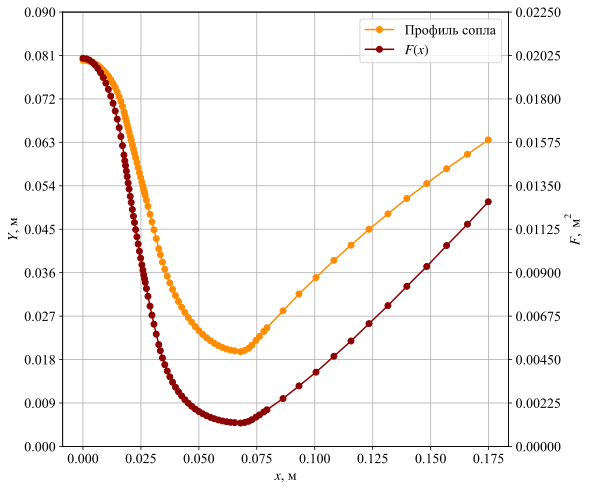

In [13]:
XY_soplo = np.array(pd.read_excel('Soplo.xlsx'))
F_x = np.pi * 0.25 * ((XY_soplo[:,1]*1e-3*2)**2)
# Выполнить округление d_kr до значения, полученного ранее
fig = plt.figure(figsize=(8, 8))
host = fig.add_subplot(111)
fig.patch.set_facecolor('white')
par1 = host.twinx()

# host.set_xlim(0, 20)

Ylim = (0, 0.09, 11)
Flim = (0, 0.0225, 11)

host.set_ylim(*Ylim)
par1.set_ylim(*Flim)

n_g = 11
host.yaxis.set_ticks(np.linspace(*Ylim, n_g))
par1.yaxis.set_ticks(np.linspace(*Flim, n_g))

host.set_xlabel("$\mathit{x}$, м")
host.set_ylabel("$\mathit{Y}$, м")
par1.set_ylabel("$\mathit{F},$ $м^2$")

color1 = 'darkorange'
color2 = 'darkred'


p11, = host.plot(XY_soplo[:,0]*1e-3, XY_soplo[:,1]*1e-3, color = color1, label = 'Профиль сопла', marker='o')
p21, = par1.plot(XY_soplo[:,0]*1e-3, F_x, label = '$\mathit{F(x)}$', color = color2, marker='o')

lns = [p11, p21]

host.legend(handles=lns, loc='best')

host.grid()

### Расчет параметров по тракту сопла

In [14]:
# Основные формулы расчета
def M_func(p, T, lambd):
    M = np.sqrt(((2 * (lambd**2)) / (k_func(p, T) + 1)) /
                (1 - (((k_func(p, T) - 1) * lambd**2) / (k_func(p, T) + 1))))
    return M


def T_r_func(p, T, lambd):
    T_r = T * (1 + ((k_func(p, T)-1) / 2) *
               ((Pr_func(p, T)) ** (1/3)) * (M_func(p, T, lambd)**2))
    return T_r


def H_r_func(p, T, lambd):
    H_r = C_p_func(p, T_r_func(p, T, lambd)) * T_r_func(p, T, lambd)
    return H_r


def T_w_func(p, T, lambd):
    T_w_ = 0.8
    T_w = T_w_ * T_r_func(p, T, lambd)
    return T_w


def H_w_func(p, T, lambd):
    H_w = C_p_func(p, T_w_func(p, T, lambd)) * T_w_func(p, T, lambd)
    return H_w


def rho_w_func(p, T, lambd):
    rho_w = p * 1e6 / ((R_func(p, T_w_func(p, T, lambd))) * (T_w_func(p, T, lambd)))
    return rho_w


def V_func(p, T, lambd):
    V = M_func(p, T, lambd) * np.sqrt(k_func(p, T) * R_func(p, T) * T)
    return V


def Re_w_func(p, T, lambd, r):
    # r - радиус текущего сечения
    Re = V_func(p, T, lambd) * rho_w_func(p, T, lambd) * r / mu_func(p, T)
    return Re


def St_zv(p, T, lambd, r):
    part_1 = 0.0326 * (Re_w_func(p, T, lambd, r)**(-0.2)) * \
        (Pr_func(p, T)**(-0.6))
    part_2 = (((H_w_func(p, T, lambd)) / (H_r_func(p, T, lambd))) ** 0.39) * (1 +
                                                                              ((k_func(p, T) - 1) / 2) * (Pr_func(p, T)**(1/3)) * (M_func(p, T, lambd)**2))**0.11
    St_zv = part_1 * part_2
    return St_zv


def k_sh_func():
    k_s = 0.2
    k_sh = 1 + 0.15 * k_s**(0.29)
    return k_sh


def k_p_func(p, T, lambd, r):
    k_p = 1 + (0.0246)*((Re_w_func(p, T, lambd, r)**(-0.3))) * \
        ((z / (1 - z))**2.45)
    return k_p


def St_func(p, T, lambd, r):
    St = St_zv(p, T, lambd, r) * k_sh_func() * k_p_func(p, T, lambd, r)
    return St


def alpha_T(p, T, lambd, r):
    alpha_T = rho_w_func(p, T, lambd) * V_func(p, T, lambd) * \
        St_func(p, T, lambd, r) * C_p_func(p, T)
    return alpha_T


def q_k_func(p, T, lambd, r):
    q_k = alpha_T(p, T, lambd, r) * \
        (T_r_func(p, T, lambd) - T_w_func(p, T, lambd))
    return q_k


In [15]:
p_a

0.1

In [16]:
# Алгоритм расчета параметров
for uu in range(XY_soplo[:, 1].shape[0]):
    if np.abs(XY_soplo[:, 1][uu] - round(r_kr*1e3, 5)) <= 0.00001:
        break
index_x_kr = uu
# Координата критического сечения
x_kr = XY_soplo[:, 0][index_x_kr]
# Длина сопла
L_c = XY_soplo[:, 0][-1]
L_diap = np.linspace(0, L_c, 100)

lambd_i_1 = 0
p_i_1 = p_0
T_i_1 = T_0

lam_list, Max_list, V_list = [], [], []
rho_list, p_list, T_list, T_r_list, Re_list, St_list, St_zv_list, alpha_list, q_k_list = [
], [], [], [], [], [], [], [], []
H2O_list, CO2_list, CH4_list = [], [], []
MMg_list = []
T_w_list = []
p_H2O_list, p_CO2_list = [], []

for x_j in range(len(XY_soplo[:, 0])):
    if XY_soplo[:, 0][x_j]*1e-3 <= x_kr*1e-3:
        def for_lambd_j(lambd):
            return q_GD(lambd, k_func(p_i_1, T_i_1)) - F_kr / F_x[x_j]
        lambd_j = fsolve(for_lambd_j, 0.1)[0]
    elif XY_soplo[:, 0][x_j]*1e-3 > x_kr*1e-3:
        def for_lambd_j(lambd):
            return q_GD(lambd, k_func(p_i_1, T_i_1)) - F_kr / F_x[x_j]
        lambd_j = fsolve(for_lambd_j, 2)[0]
    lam_list.append(lambd_j)
    r_i = np.sqrt(F_x[x_j] / np.pi)
    p_i = p_0 * pi_GD(lambd_j, k_func(p_i_1, T_i_1))
    if p_i < p_a: # p_i мб меньше атмосферного на чуть-чуть, поэтому происходит вылет
        p_i = p_a
    p_list.append(p_i)
    T_i = T_0 * tau_GD(lambd_j, k_func(p_i, T_i_1))
    T_list.append(T_i)

    m_i = M_func(p_i, T_i, lambd_j)
    Max_list.append(m_i)

    V_i = V_func(p_i, T_i, lambd_j)
    V_list.append(V_i)

    rho_i = rho_w_func(p_i, T_i, lambd_j)
    rho_list.append(rho_i)

    T_r_i = T_r_func(p_i, T_i, lambd_j)
    T_r_list.append(T_r_i)

    T_w_i = T_w_func(p_i, T_i, lambd_j)
    T_w_list.append(T_w_i)

    Re_i = Re_w_func(p_i, T_i, lambd_j, r_i)
    Re_list.append(Re_i)

    St_zv_i = St_zv(p_i, T_i, lambd_j, r_i)
    St_i = St_func(p_i, T_i, lambd_j, r_i)
    St_list.append(St_i)
    St_zv_list.append(St_zv_i)

    alpha_T_i = alpha_T(p_i, T_i, lambd_j, r_i)
    alpha_list.append(alpha_T_i)

    q_k_i = q_k_func(p_i, T_i, lambd_j, r_i)
    q_k_list.append(q_k_i)

    H2O_i = H2O_func(p_i, T_i)
    CO2_i = CO2_func(p_i, T_i)
    CH4_i = CH4_func(p_i, T_i)

    H2O_list.append(H2O_i)
    CO2_list.append(CO2_i)
    CH4_list.append(CH4_i)

    MMg_i = MMg_func(p_i, T_i)
    MMg_list.append(MMg_i)

    p_H2O = H2O_i * MMg_i * 1e-3 * p_i
    p_CO2 = CO2_i * MMg_i * 1e-3 * p_i
    p_H2O_list.append(p_H2O)
    p_CO2_list.append(p_CO2)

    p_i_1 = p_i
    T_i_1 = T_i


In [17]:
x_kr

68.0

2.225 2.22
0.6771015514146341
0.0


(1073.0213985070843, 1065.8048175523852)

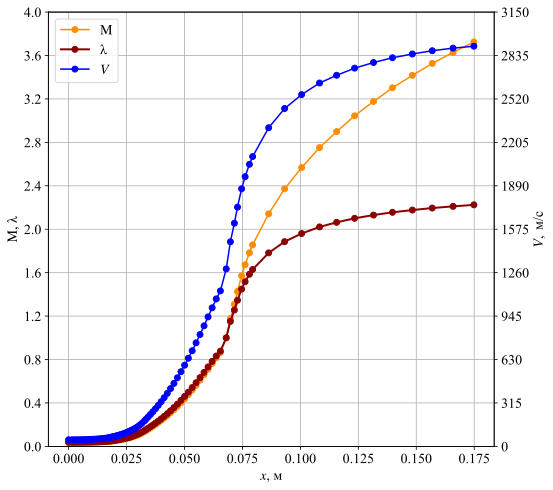

In [18]:
fig = plt.figure(figsize=(8, 8))
host = fig.add_subplot(111)
fig.patch.set_facecolor('white')
par1 = host.twinx()

# host.set_xlim(0, 20)

Mlim = (0, 4, 11)
vlim = (0, 3150, 11)

host.set_ylim(*Mlim)
par1.set_ylim(*vlim)

n_g = 11
host.yaxis.set_ticks(np.linspace(*Mlim, n_g))
par1.yaxis.set_ticks(np.linspace(*vlim, n_g))

host.set_xlabel("$\mathit{x}$, м")
host.set_ylabel("$\mathrm{M}$"+", $\lambda$")
par1.set_ylabel("$\mathit{V},$ м/с")

color1 = 'darkorange'
color2 = 'darkred'
color3 = 'blue'


p11, = host.plot(XY_soplo[:,0]*1e-3, Max_list, color = color1, label = '$\mathrm{M}$', marker='o')
p12, = host.plot(XY_soplo[:,0]*1e-3, lam_list, color = color2, label = '$\lambda$', linewidth = 2, marker='o')
p21, = par1.plot(XY_soplo[:,0]*1e-3, V_list, color = color3, label = '$\mathit{V}$', marker='o')

lns = [p11, p12, p21]

host.legend(handles=lns, loc='best')

host.grid()

print(round(lambd_j, 3), round(lambda_a,3))
print((T_i - T_a) / T_a * 100)
print((round(p_i,3) - p_a) / p_a * 100)
T_i, T_a

0.1 -0.0130767332839871


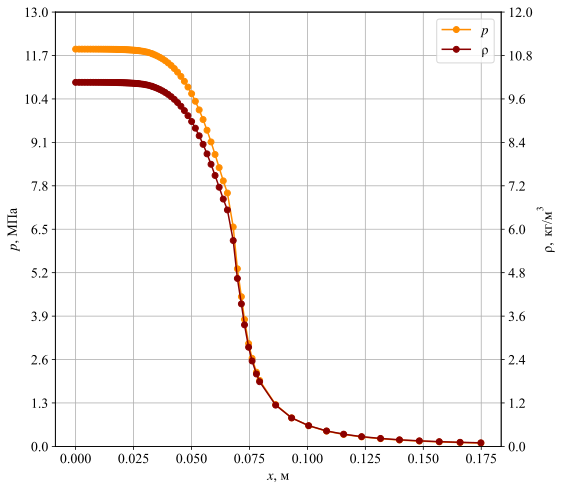

In [19]:
fig = plt.figure(figsize=(8, 8))
host = fig.add_subplot(111)
fig.patch.set_facecolor('white')
par1 = host.twinx()

# host.set_xlim(0, 20)

plim = (0, 13, 11)
rholim = (0, 12, 11)

host.set_ylim(*plim)
par1.set_ylim(*rholim)

n_g = 11
host.yaxis.set_ticks(np.linspace(*plim, n_g))
par1.yaxis.set_ticks(np.linspace(*rholim, n_g))

host.set_xlabel("$\mathit{x}$, м")
host.set_ylabel("$\mathit{p}$, МПа")
par1.set_ylabel("$\\rho,$ $кг/м^3$")

color1 = 'darkorange'
color2 = 'darkred'


p11, = host.plot(XY_soplo[:,0]*1e-3, p_list, color = color1, label = '$\mathit{p}$', marker='o')
p21, = par1.plot(XY_soplo[:,0]*1e-3, rho_list, color = color2, label = '$\\rho$', marker='o')

lns = [p11, p21]

host.legend(handles=lns, loc='best')

host.grid()
print(p_list[-1], (p_list[-1]-0.101325)/0.101325)

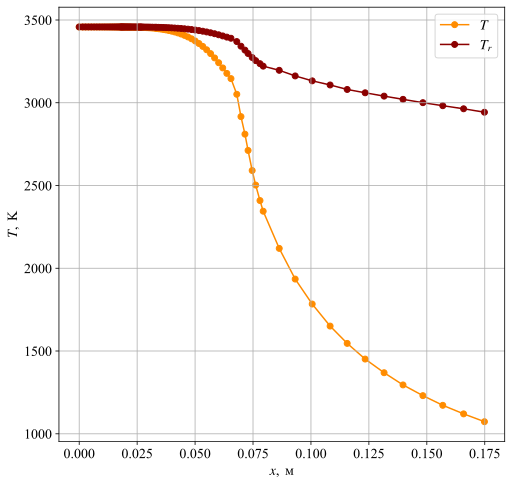

1073.0213985070843 1065.8048175523852


In [20]:
f = plt.figure(figsize=(8, 8))
color1 = 'darkorange'
color2 = 'darkred'
plt.plot(XY_soplo[:,0]*1e-3, T_list, zorder = 1, color = color1, label = '$\mathit{T}$', marker='o')

plt.plot(XY_soplo[:,0]*1e-3, T_r_list, zorder = 1, color = color2, label = '$\mathit{T_r}$', marker='o')

# plt.ylim(0,3000)
plt.legend()
plt.grid()
plt.xlabel('$\mathit{x},$ м')
plt.ylabel('$\mathit{T},$ K')
plt.show()
print(T_list[-1], T_a)

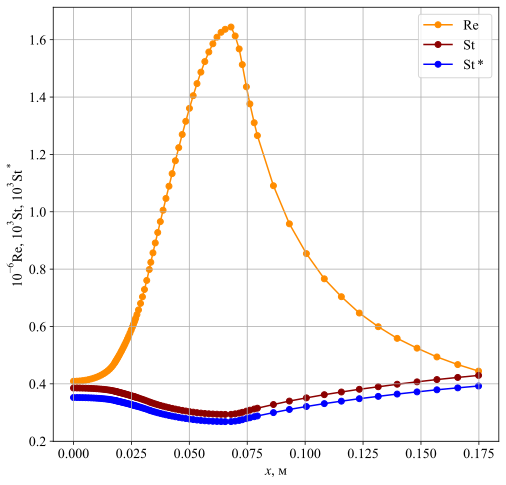

In [21]:
fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')

# host.set_xlim(0, 20)


plt.xlabel("$\mathit{x}$, м")
plt.ylabel("$10^{-6}\mathrm{Re}$," + " $10^{3}\mathrm{St}$, " + "$10^{3}\mathrm{St}^*$")

color1 = 'darkorange'
color2 = 'darkred'
color3 = 'blue'


p11, = plt.plot(XY_soplo[:,0]*1e-3, np.array(Re_list)*1e-6, zorder = 1, color = color1, label = '$Re$', marker='o')
p21, = plt.plot(XY_soplo[:,0]*1e-3, np.array(St_list)*1e2, zorder = 1, color = color2, label = '$St$', marker='o')
p22, = plt.plot(XY_soplo[:,0]*1e-3, np.array(St_zv_list)*1e2, zorder = 1, color = color3, label = '$St*$', marker='o')


plt.legend(loc='best')

plt.grid()

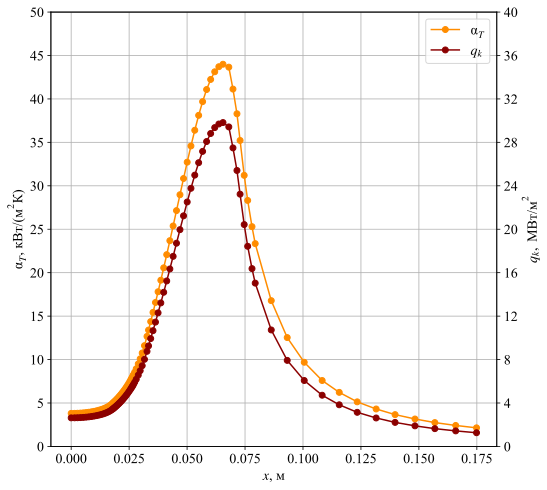

In [22]:
fig = plt.figure(figsize=(8, 8))
host = fig.add_subplot(111)
fig.patch.set_facecolor('white')
par1 = host.twinx()

# host.set_xlim(0, 20)

alphalim = (0, 50, 11)
qlim = (0, 40, 11)

host.set_ylim(*alphalim)
par1.set_ylim(*qlim)

n_g = 11
host.yaxis.set_ticks(np.linspace(*alphalim, n_g))
par1.yaxis.set_ticks(np.linspace(*qlim, n_g))

host.set_xlabel("$\mathit{x}$, м")
host.set_ylabel("$\\alpha_{\mathit{T}}$, $кВт/(м^2К)$")
par1.set_ylabel("$\mathit{q_k},$ $МВт/м^2$")

color1 = 'darkorange'
color2 = 'darkred'


p11, = host.plot(XY_soplo[:,0]*1e-3, np.array(alpha_list)*1e-3, color = color1, label = '$\\alpha_{\mathit{Т}}$', marker='o')
p21, = par1.plot(XY_soplo[:,0]*1e-3, np.array(q_k_list)*1e-6, color = color2, label = '$\mathit{q_k}$', marker='o')

lns = [p11, p21]

host.legend(handles=lns, loc='best')

host.grid()

Text(0, 0.5, '$C, моль/кг$')

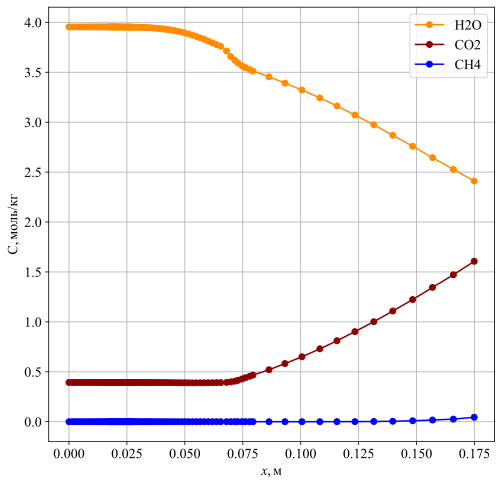

In [23]:
f = plt.figure(figsize=(8, 8))
plt.plot(XY_soplo[:,0]*1e-3, H2O_list, color = color1, label = '$H2O$', marker='o')

plt.plot(XY_soplo[:,0]*1e-3, CO2_list, color = color2, label = '$CO2$', marker='o')

plt.plot(XY_soplo[:,0]*1e-3, CH4_list, color = color3, label = '$CH4$', marker='o')

plt.legend()
plt.grid()
plt.xlabel('$\mathit{x}, м$')
plt.ylabel('$C, моль/кг$')

In [24]:
# Интерполяция вычисленных массивов
X_interp = XY_soplo[:,0]*1e-3
p_x = interp1d(X_interp, p_list)
T_x = interp1d(X_interp, T_list)
T_r_x = interp1d(X_interp, T_r_list)
T_w_x = interp1d(X_interp, T_w_list)
C_H2O = interp1d(X_interp, H2O_list)
C_CO2 = interp1d(X_interp, CO2_list)
C_CH4 = interp1d(X_interp, CH4_list)
M_mu = interp1d(X_interp, MMg_list)
q_k_x = interp1d(X_interp, q_k_list)
p_H2O_x = interp1d(X_interp, p_H2O_list)
p_CO2_x = interp1d(X_interp, p_CO2_list)

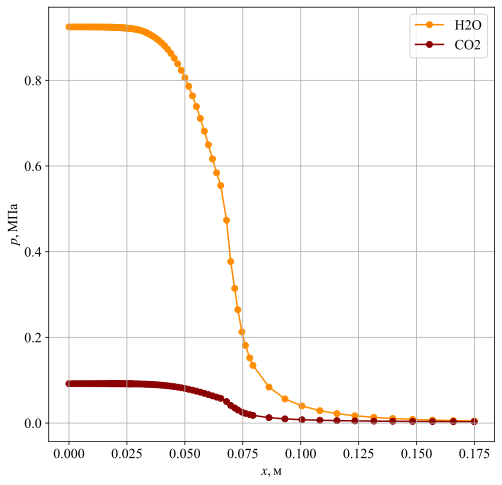

In [25]:
f = plt.figure(figsize=(8, 8))

plt.plot(XY_soplo[:,0]*1e-3, p_H2O_list, zorder = 1, color = color1, label = '$H2O$', marker='o')

plt.plot(XY_soplo[:,0]*1e-3, p_CO2_list, zorder = 1, color = color2, label = '$CO2$', marker='o')

plt.legend()
plt.grid()
plt.xlabel('$\mathit{x}, м$')
plt.ylabel('$\mathit{p}, МПа$')
plt.show()

In [26]:
apr_H2O = np.array(pd.read_excel('aproks_H2O.xlsx'))
apr_CO2 = np.array(pd.read_excel('aproks_CO2.xlsx'))
apr_n = np.array(pd.read_excel('apr_n.xlsx'))

a_1_apr = interp1d(apr_CO2[:,0], apr_CO2[:,1])
a_2_apr = interp1d(apr_CO2[:,0], apr_CO2[:,2])
a_3_apr = interp1d(apr_CO2[:,0], apr_CO2[:,3])

b_1_apr = interp1d(apr_H2O[:,0], apr_H2O[:,1])
b_2_apr = interp1d(apr_H2O[:,0], apr_H2O[:,2])

c_1_apr = interp1d(apr_n[:,0], apr_n[:,1])
c_2_apr = interp1d(apr_n[:,0], apr_n[:,2])
c_3_apr = interp1d(apr_n[:,0], apr_n[:,3])
c_4_apr = interp1d(apr_n[:,0], apr_n[:,4])


In [27]:
F_x_func = interp1d(X_interp, F_x)

def l_func(x):
    return 0.9 * np.sqrt(4 * F_x_func(x) / np.pi)
def eps_CO2(pl, T):
    eps_CO2 = 0.025 * (10 ** ((a_1_apr(pl)*1e-8*(T**2)) + (a_2_apr(pl) * 1e-5*T) + (a_3_apr(pl))))
    return eps_CO2
def eps_0_H2O(pl, T):
    eps_0_H2O = 0.01 * (10 ** (b_1_apr(pl)*T + b_2_apr(pl)))
    return eps_0_H2O
def n_kef(pl, p):
    n = 10 ** ((c_1_apr(pl)*(np.log10(p) ** 3)) + (c_2_apr(pl)*(np.log10(p) ** 2)) + (c_3_apr(pl)*(np.log10(p))) + (c_4_apr(pl)))
    return n
def eps_H2O(pl, T, p):
    eps_H2O = 1 - (1 - eps_0_H2O(pl, T))**n_kef(pl,p)
    return eps_H2O
def eps_g(pl, T, p):
    eps_g = eps_H2O(pl, T, p) + eps_CO2(pl, T) - eps_H2O(pl, T, p) * eps_CO2(pl, T)
    return eps_g
def d_43():
    if z == 0:
        return 0
    else:
        t_k=0.5
        return 10.68 * (D_kr*1e3)**(0.293)*(1 - np.exp(-0.1128*z*t_k*p_0*1e-6))
def d_l_func(x):
    if z==0:
        return 0
    else:
        return 0.042 * z / rho_kf * (T_r_x(x) / (d_43())**2)**(1/3)
def eps_PS(x):
    eps_PS = 1 - (1 - eps_g(p_x(x)*l_func(x), T_x(x), p_x(x)) * np.exp(-d_l_func(x)*l_func(x)))
    return eps_PS

In [28]:
d_43()

6.459977926531984e-06

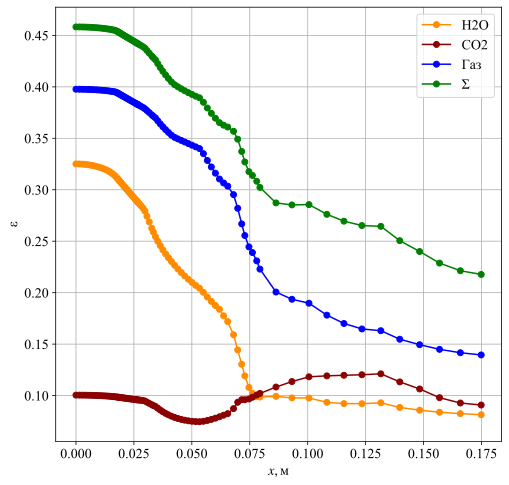

In [29]:
f = plt.figure(figsize=(8, 8))

plt.plot(X_interp, eps_PS(X_interp), color = color1, label = '$H2O$', marker='o')

plt.plot(X_interp, eps_CO2(p_x(X_interp) * 10 * l_func(X_interp), T_x(X_interp)), color = color2, label = '$CO2$', marker='o')

plt.plot(X_interp, eps_H2O(p_x(X_interp) * 10 * l_func(X_interp), T_x(X_interp), p_x(X_interp)), color = color3, label = '$Газ$', marker='o')

plt.plot(X_interp, eps_g(p_x(X_interp) * 10 * l_func(X_interp), T_x(X_interp), p_x(X_interp)), color = 'green', label = '$\Sigma$', marker='o')


plt.legend()
plt.grid()
plt.xlabel('$\mathit{x}, м$')
plt.ylabel('$\epsilon$')
plt.show()

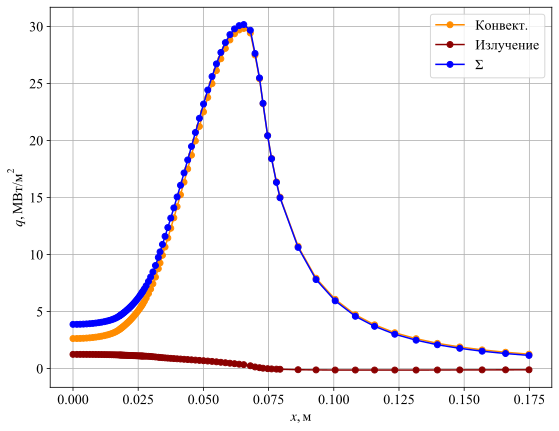

In [30]:
def q_l_func(x):
    eps_w = 0.8
    sigma_0 = 5.67 * 1e-8
    q_l = eps_w * eps_PS(x) * sigma_0 * ((T_x(x)**4) - (T_w_x(x)**4))
    return q_l
def q_summa(x):
    q_summa = q_k_x(x) + q_l_func(x)
    return q_summa

f = plt.figure(figsize=(9, 7))
plt.plot(X_interp, q_k_x(X_interp)*1e-6, color = color1, label = '$Конвект.$', marker='o')

plt.plot(X_interp, q_l_func(X_interp)*1e-6,  color = color2, label = '$Излучение$', marker='o')


plt.plot(X_interp, q_summa(X_interp)*1e-6, color = color3, label = '$\Sigma$', marker='o')


plt.legend()
plt.ylabel('$\mathit{q}, МВт/м^2$')
plt.xlabel('$\mathit{x}, м$')
plt.grid()

### Определение потерь удельного импульса

In [31]:
# Потери удельного импульса на рассеяние
L_ = L_a / r_kr
y_a = D_a / D_kr
L_p = 5.88*y_a - 5.44
L_0 = L_ / L_p
def dzeta_p(y_a, L_):
    dzeta_p = (13.2 - (8.9 * k_func(p_0, T_0) - 9.8) * np.sqrt(y_a)) * (((0.96 - ((L_) / (5.88*y_a - 5.44))) ** 6) / ((0.37 + 0.114*y_a) ** 2))
    return dzeta_p
print(f'L_a / r_kr = {L_}')
print(f'L_0 / L_p = {L_0}')
print(f'D_a / D_kr = {round(y_a,2)}')
print(f'Потери на рассеяние для спроектированного сопла dzeta_p = {round(dzeta_p(y_a, L_),2)} %')
d_a_d_kr = np.linspace(2, 10, 100)
d_a_d_kr_for_sc = np.linspace(2, 10, (10-2)+1)
L_str_list = [2,5,L_,8]

L_a / r_kr = 5.2
L_0 / L_p = 0.38515684424026797
D_a / D_kr = 3.22
Потери на рассеяние для спроектированного сопла dzeta_p = 0.71 %


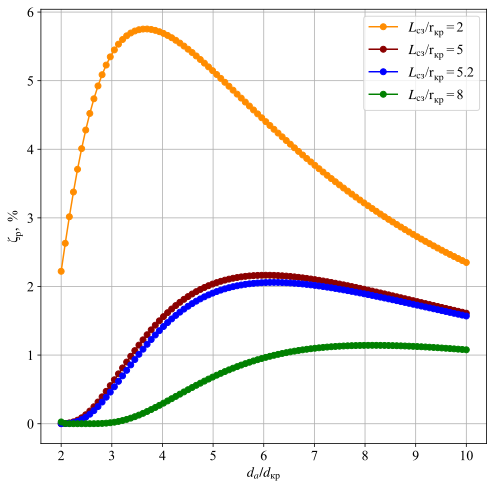

In [32]:
f = plt.figure(figsize=(8, 8))
plt.plot(d_a_d_kr, dzeta_p(d_a_d_kr, L_str_list[0]), color = color1, label = '$\mathit{L_{\mathrm{сз}}} / r_{\mathrm{кр}} = 2$', marker='o')

plt.plot(d_a_d_kr, dzeta_p(d_a_d_kr, L_str_list[1]), color = color2, label = '$\mathit{L_{\mathrm{сз}}} / r_{\mathrm{кр}} = 5$', marker='o')

plt.plot(d_a_d_kr, dzeta_p(d_a_d_kr, L_str_list[2]), color = color3, label = '$\mathit{L_{\mathrm{сз}}} / r_{\mathrm{кр}} = 5.2$', marker='o')

plt.plot(d_a_d_kr, dzeta_p(d_a_d_kr, L_str_list[3]), color = 'green', label = '$\mathit{L_{\mathrm{сз}}} / r_{\mathrm{кр}} = 8$', marker='o')

plt.xlabel('$\mathit{d_a / d_{\mathrm{кр}}}$')
plt.ylabel('$\zeta_p,$ %')
plt.legend()
plt.grid()

In [33]:
# Потери на трение
def dzeta_tr(y_a, L_):
    T_ct_ = 0.6
    K_s_ = 0.002
    dzeta_tr = 0.56 * ((y_a - 1)**0.5) * (((2.62) / ((k_func(p_0,T_0)**2)*T_ct_**(0.33))) - 1) * (L_ / (5.88*y_a - 5.44)) * (1 + 16.88*K_s_**0.4)   
    return dzeta_tr
print(f'Потери для спроектированного сопла на трение dzeta_tr = {round(dzeta_tr(y_a, L_),3)} %')

Потери для спроектированного сопла на трение dzeta_tr = 0.734 %


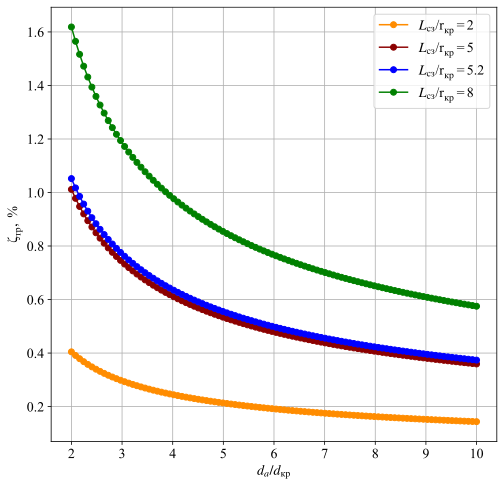

In [34]:
f = plt.figure(figsize=(8, 8))
plt.plot(d_a_d_kr, dzeta_tr(d_a_d_kr, L_str_list[0]), color = color1, label = '$\mathit{L_{\mathrm{сз}}} / r_{\mathrm{кр}} = 2$', marker='o')

plt.plot(d_a_d_kr, dzeta_tr(d_a_d_kr, L_str_list[1]), color = color2, label = '$\mathit{L_{\mathrm{сз}}} / r_{\mathrm{кр}} = 5$', marker='o')

plt.plot(d_a_d_kr, dzeta_tr(d_a_d_kr, L_str_list[2]), color = color3, label = '$\mathit{L_{\mathrm{сз}}} / r_{\mathrm{кр}} = 5.2$', marker='o')

plt.plot(d_a_d_kr, dzeta_tr(d_a_d_kr, L_str_list[3]), color = 'green', label = '$\mathit{L_{\mathrm{сз}}} / r_{\mathrm{кр}} = 8$', marker='o')

plt.xlabel('$\mathit{d_a / d_{\mathrm{кр}}}$')
plt.ylabel('$\zeta_{тр},$ %')
plt.legend()
plt.grid()

In [35]:
# Потери на неравновесность k-f
def get_dzeta_dv():
    dzeta_0 = 14.4 * (D_kr*10**3)**(-0.33)
    if 0 < z < 0.5: 
        k_0 = (z / 0.3)**2
    else:
        k_0 = 1
    if 2 < p_0 < 8: 
        k_1 = 1.047 - 0.0013*p_0*10
    else:
        k_1 = 1
    if 0.3 < L_0 < 0.5: 
        k_2 = 1.3 - 0.462 * L_0
    else:
        k_2 = 1
    if 3 < y_a < 6: 
        k_3 = 1.112 - 0.037*y_a
    else:
        k_3 = 1
    if 3e-6 < d_43() < 7e-6: 
        k_4 = 1.162 - 0.168*d_43()*1e6
    else:
        k_4 = 1
    dzeta_dv = dzeta_0*k_0*k_1*k_2*k_3*k_4
    return dzeta_dv
dzeta_dv = get_dzeta_dv()
dzeta_dv

0.385120348315544

In [36]:
dzeta_tepl = 0.5
dzeta_tepl

0.5

In [37]:
# Потери на отсутствие кристаллизации
def get_dzeta_kr():
    delta_i_pl = 390e3
    T_pl = 2300
    dzeta_kr = (z * delta_i_pl * (1 - (T_list[-1] / T_pl))) / (V_list[-1]**2) * 100
    return dzeta_kr
dzeta_kr = get_dzeta_kr()
dzeta_kr

0.7593327896495976

In [38]:
# Суммарные потери
dzeta = round(dzeta_p(y_a, L_),2) + round(dzeta_tr(y_a, L_),2) + get_dzeta_dv() + get_dzeta_kr() + dzeta_tepl
dzeta

3.0844531379651414

In [39]:
J_sum = 8.2e4
J_sum_res = J_sum * (100 - dzeta) / 100 
J_sum_res

79470.74842686858